In [1]:
import math
import os
import re
import altair as alt
import numpy as np
import pandas as pd
import scipy.stats
import yaml
import neutcurve
import scipy.stats
print(f"Using `neutcurve` version {neutcurve.__version__}")
import sys
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# allow more rows for Altair
_ = alt.data_transformers.disable_max_rows()

#import altair themes from /data/custom_analyses_data/theme.py and enable
import theme
alt.themes.register('main_theme', theme.main_theme)
alt.themes.enable('main_theme')
os.chdir('/fh/fast/bloom_j/computational_notebooks/tmcmahon/2024/02_RSV/RSV_evolution_neut') #sets working directory to repo/project root folder
plt.rcParams['svg.fonttype'] = 'none' #from bernadeta, for correct font svg output

Using `neutcurve` version 2.1.0


In [2]:
H3_1 = pd.read_csv('01_data/combined_frac_infect/H3_Historical_Sera_1_frac_infect.csv')
H3_2 = pd.read_csv('01_data/combined_frac_infect/H3_Historical_Sera_2_frac_infect.csv')

In [3]:
# Remove leading/trailing spaces in the 'virus' column for H3_1
H3_1['virus'] = H3_1['virus'].str.strip()

# Remove leading/trailing spaces in the 'virus' column for H3_2
H3_2['virus'] = H3_2['virus'].str.strip()

# Verify the changes
print(H3_1['virus'].unique())
print(H3_2['virus'].unique())

['Influenza H3 2022' 'Influenza H3 1982']
['Influenza H3 2022' 'Influenza H3 1982']


In [4]:
H3_1_fits = neutcurve.curvefits.CurveFits(
            data=H3_1,
            fixbottom=0,
            #max_viruses_per_subplot=11
            )
H3_1_fits.fitParams().to_csv("03_output/processed_data/H3_Historical_Sera_1_fits.csv")

/fh/fast/bloom_j/software/miniforge3/envs/BloomLab/lib/python3.12/site-packages/neutcurve/hillcurve.py:803: OptimizeWarning: Covariance of the parameters could not be estimated
  (popt, pcov) = scipy.optimize.curve_fit(
/fh/fast/bloom_j/software/miniforge3/envs/BloomLab/lib/python3.12/site-packages/neutcurve/hillcurve.py:1177: RuntimeWarning: invalid value encountered in power
  return b + (t - b) / (1 + (c / m) ** s)
/fh/fast/bloom_j/software/miniforge3/envs/BloomLab/lib/python3.12/site-packages/neutcurve/hillcurve.py:803: OptimizeWarning: Covariance of the parameters could not be estimated
  (popt, pcov) = scipy.optimize.curve_fit(
/fh/fast/bloom_j/software/miniforge3/envs/BloomLab/lib/python3.12/site-packages/neutcurve/hillcurve.py:803: OptimizeWarning: Covariance of the parameters could not be estimated
  (popt, pcov) = scipy.optimize.curve_fit(
/fh/fast/bloom_j/software/miniforge3/envs/BloomLab/lib/python3.12/site-packages/neutcurve/hillcurve.py:1177: RuntimeWarning: overflow enco

In [5]:
H3_1_IC50 = pd.read_csv("03_output/processed_data/H3_Historical_Sera_1_fits.csv")
H3_1_IC50['NT50'] = 1 / H3_1_IC50['ic50']
H3_1_IC50['Experiment_Rep'] = 1
#H3_2_IC50.to_csv("03_output/processed_data/H3_Historical_Sera_2_NT50.csv")

In [6]:
H3_2_fits = neutcurve.curvefits.CurveFits(
            data=H3_2,
            fixbottom=0,
            #max_viruses_per_subplot=11
            )
H3_2_fits.fitParams().to_csv("03_output/processed_data/H3_Historical_Sera_2_fits.csv")

/fh/fast/bloom_j/software/miniforge3/envs/BloomLab/lib/python3.12/site-packages/neutcurve/hillcurve.py:803: OptimizeWarning: Covariance of the parameters could not be estimated
  (popt, pcov) = scipy.optimize.curve_fit(
/fh/fast/bloom_j/software/miniforge3/envs/BloomLab/lib/python3.12/site-packages/neutcurve/hillcurve.py:1177: RuntimeWarning: invalid value encountered in power
  return b + (t - b) / (1 + (c / m) ** s)
/fh/fast/bloom_j/software/miniforge3/envs/BloomLab/lib/python3.12/site-packages/neutcurve/hillcurve.py:803: OptimizeWarning: Covariance of the parameters could not be estimated
  (popt, pcov) = scipy.optimize.curve_fit(
/fh/fast/bloom_j/software/miniforge3/envs/BloomLab/lib/python3.12/site-packages/neutcurve/hillcurve.py:803: OptimizeWarning: Covariance of the parameters could not be estimated
  (popt, pcov) = scipy.optimize.curve_fit(
/fh/fast/bloom_j/software/miniforge3/envs/BloomLab/lib/python3.12/site-packages/neutcurve/hillcurve.py:803: OptimizeWarning: Covariance of

In [7]:
H3_2_IC50 = pd.read_csv("03_output/processed_data/H3_Historical_Sera_2_fits.csv")
H3_2_IC50['NT50'] = 1 / H3_2_IC50['ic50']
H3_2_IC50['Experiment_Rep'] = 2
#H3_2_IC50.to_csv("03_output/processed_data/H3_Historical_Sera_2_NT50.csv")

In [8]:
H3_IC50 = pd.concat([H3_1_IC50, H3_2_IC50], ignore_index=True)
H3_IC50.to_csv("03_output/processed_data/H3_Historical_Sera_NT50.csv")
H3_IC50

,Unnamed: 0,serum,virus,replicate,nreplicates,ic50,ic50_bound,ic50_str,midpoint,midpoint_bound,midpoint_bound_type,slope,top,bottom,r2,rmsd,NT50,Experiment_Rep
0,0,85_1,Influenza H3 2022,average,2,0.025000,lower,>0.025,2.269199e+06,0.025000,lower,101.848877,1.0,0.0,-0.749920,0.749096,40.000000,1
1,1,85_1,Influenza H3 1982,average,2,0.024853,interpolated,0.0249,2.485308e-02,0.024853,interpolated,18.285666,1.0,0.0,0.185013,0.361200,40.236458,1
2,2,85_2,Influenza H3 2022,average,2,0.025000,lower,>0.025,5.416900e+03,0.025000,lower,1.500000,1.0,0.0,-0.326868,1.479163,40.000000,1
3,3,85_2,Influenza H3 1982,average,2,0.000901,interpolated,0.000901,9.006515e-04,0.000901,interpolated,0.516753,1.0,0.0,0.822477,0.127171,1110.307391,1
4,4,85_4,Influenza H3 2022,average,2,0.025000,lower,>0.025,5.521871e+03,0.025000,lower,1.500000,1.0,0.0,-1.034633,0.729990,40.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,35,87_7,Influenza H3 1982,average,2,0.010076,interpolated,0.0101,1.007569e-02,0.010076,interpolated,0.320967,1.0,0.0,0.560532,0.142615,99.248807,2
78,36,87_8,Influenza H3 2022,average,2,0.025000,lower,>0.025,4.581838e+02,0.025000,lower,0.097027,1.0,0.0,0.136297,0.121570,40.000000,2
79,37,87_8,Influenza H3 1982,average,2,0.001848,interpolated,0.00185,1.847599e-03,0.001848,interpolated,1.974715,1.0,0.0,0.990676,0.040220,541.242940,2
80,38,87_9,Influenza H3 2022,average,2,0.001788,interpolated,0.00179,1.787991e-03,0.001788,interpolated,0.690173,1.0,0.0,0.919793,0.084244,559.286998,2


In [9]:
# Combine the datasets
H3_IC50 = pd.concat([H3_1_IC50, H3_2_IC50], ignore_index=True)

# Check if any sera have only one replicate after filtering out 'BEI_neg'
H3_IC50_filtered = H3_IC50[H3_IC50['serum'] != 'BEI_neg']

# Count replicates per serum
replicate_counts = H3_IC50_filtered.groupby(['virus', 'serum']).size().reset_index(name='replicate_count')

# Find cases where there is only one replicate
single_replicates = replicate_counts[replicate_counts['replicate_count'] == 1]

# Display the results
single_replicates
replicate_counts

,virus,serum,replicate_count
0,Influenza H3 1982,85_1,2
1,Influenza H3 1982,85_2,2
2,Influenza H3 1982,85_3,2
3,Influenza H3 1982,85_4,2
4,Influenza H3 1982,85_6,2
5,Influenza H3 1982,85_7,2
6,Influenza H3 1982,85_8,2
7,Influenza H3 1982,86_1,2
8,Influenza H3 1982,86_10,2
9,Influenza H3 1982,86_12,2


In [10]:
# Generate the H3_supplement.csv file with only geo_mean_NT50, NT50_rep1, and NT50_rep2
H3_IC50 = pd.concat([H3_1_IC50, H3_2_IC50], ignore_index=True)
H3_IC50_filtered = H3_IC50[H3_IC50['serum'] != 'BEI_neg']
# Function to compute geometric mean
def compute_geo_mean(group):
    positive_values = group['NT50'][group['NT50'] > 0]
    geo_mean = np.exp(np.mean(np.log(positive_values))) if len(positive_values) > 1 else positive_values.iloc[0]
    return pd.Series({'geo_mean_NT50': geo_mean})

# Function to extract NT50 values for replicate 1 and replicate 2
def extract_replicates(group):
    NT50_rep1 = group.loc[group['Experiment_Rep'] == 1, 'NT50'].values[0] if (group['Experiment_Rep'] == 1).any() else np.nan
    NT50_rep2 = group.loc[group['Experiment_Rep'] == 2, 'NT50'].values[0] if (group['Experiment_Rep'] == 2).any() else np.nan
    return pd.Series({'NT50_rep1': NT50_rep1, 'NT50_rep2': NT50_rep2})

# Ensure H3_IC50_filtered exists
if 'H3_IC50_filtered' in locals():
    # Group by virus and serum, compute geometric mean, and extract replicates
    H3_supplement = (
        H3_IC50_filtered.groupby(['virus', 'serum'])
        .apply(lambda group: pd.concat([compute_geo_mean(group), extract_replicates(group)]))
        .reset_index()
    )

    # Save to CSV
    H3_supplement.to_csv("03_output/processed_data/H3_supplement.csv", index=False)
H3_supplement

/tmp/ipykernel_30349/2267033376.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: pd.concat([compute_geo_mean(group), extract_replicates(group)]))


,virus,serum,geo_mean_NT50,NT50_rep1,NT50_rep2
0,Influenza H3 1982,85_1,40.118055,40.236458,40.000000
1,Influenza H3 1982,85_2,780.027897,1110.307391,547.995560
2,Influenza H3 1982,85_3,22849.713566,22122.901148,23600.404240
3,Influenza H3 1982,85_4,52.833848,67.114988,41.591537
4,Influenza H3 1982,85_6,238.069710,408.086058,138.885379
5,Influenza H3 1982,85_7,11930.472538,16911.775578,8416.394501
6,Influenza H3 1982,85_8,422.987291,347.541732,514.810833
7,Influenza H3 1982,86_1,68.854358,104.305329,45.452353
8,Influenza H3 1982,86_10,2222.411427,3768.387975,1310.669863
9,Influenza H3 1982,86_12,5009.436863,7850.450104,3196.562917


In [11]:
import numpy as np
import pandas as pd

# Load and combine data
H3_IC50 = pd.concat([H3_1_IC50, H3_2_IC50], ignore_index=True)
H3_IC50.to_csv("03_output/processed_data/H3_Historical_Sera_NT50.csv", index=False)

# Function to calculate geometric mean and error bars
def compute_error_bars(group):
    positive_values = group['NT50'][group['NT50'] > 0]
    
    if len(positive_values) == 1:
        # Single replicate, no error bars
        geo_mean = positive_values.iloc[0]
        return pd.Series({
            'geo_mean_NT50': geo_mean,
            'lower': np.nan,  
            'upper': np.nan  
        })
    else:
        # Compute geometric mean and standard deviation in log space
        geo_mean = np.exp(np.mean(np.log(positive_values)))
        std = np.std(np.log(positive_values))
        lower = np.exp(np.log(geo_mean) - std)
        upper = np.exp(np.log(geo_mean) + std)
        return pd.Series({
            'geo_mean_NT50': geo_mean,
            'lower': lower,
            'upper': upper
        })

# Function to extract NT50 values for rep1 and rep2
def extract_replicates(group):
    NT50_rep1 = group[group['Experiment_Rep'] == 1]['NT50'].values[0] if 1 in group['Experiment_Rep'].values else np.nan
    NT50_rep2 = group[group['Experiment_Rep'] == 2]['NT50'].values[0] if 2 in group['Experiment_Rep'].values else np.nan
    
    return pd.Series({'NT50_rep1': NT50_rep1, 'NT50_rep2': NT50_rep2})

# Group by virus and serum, compute error bars and extract replicates
H3_IC50_mean = (
    H3_IC50.groupby(['virus', 'serum'])
    .apply(lambda group: pd.concat([compute_error_bars(group), extract_replicates(group)]))
    .reset_index()
)

# Save to CSV
H3_IC50_mean.to_csv("03_output/processed_data/H3_Historical_Sera_NT50_mean_with_error_rep.csv", index=False)
H3_IC50_mean


/tmp/ipykernel_30349/322535432.py:42: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: pd.concat([compute_error_bars(group), extract_replicates(group)]))


,virus,serum,geo_mean_NT50,lower,upper,NT50_rep1,NT50_rep2
0,Influenza H3 1982,85_1,40.118055,40.000000,40.236458,40.236458,40.000000
1,Influenza H3 1982,85_2,780.027897,547.995560,1110.307391,1110.307391,547.995560
2,Influenza H3 1982,85_3,22849.713566,22122.901148,23600.404240,22122.901148,23600.404240
3,Influenza H3 1982,85_4,52.833848,41.591537,67.114988,67.114988,41.591537
4,Influenza H3 1982,85_6,238.069710,138.885379,408.086058,408.086058,138.885379
5,Influenza H3 1982,85_7,11930.472538,8416.394501,16911.775578,16911.775578,8416.394501
6,Influenza H3 1982,85_8,422.987291,347.541732,514.810833,347.541732,514.810833
7,Influenza H3 1982,86_1,68.854358,45.452353,104.305329,104.305329,45.452353
8,Influenza H3 1982,86_10,2222.411427,1310.669863,3768.387975,3768.387975,1310.669863
9,Influenza H3 1982,86_12,5009.436863,3196.562917,7850.450104,7850.450104,3196.562917


In [12]:
unique_sera = H3_IC50_mean['serum'].unique()

# Print the result
print(unique_sera)

['85_1' '85_2' '85_3' '85_4' '85_6' '85_7' '85_8' '86_1' '86_10' '86_12'
 '86_2' '86_4' '86_6' '86_7' '86_8' '86_9' '87_4' '87_7' '87_8' '87_9'
 'BEI_neg']


## plots

In [13]:
import altair as alt

# Filter the DataFrame to exclude unwanted serum values
filtered_df = H3_IC50_mean[~H3_IC50_mean['serum'].isin(['BEI_neg'])]


# Create the chart for subtype A
chart = alt.Chart(filtered_df).mark_line(
    point=alt.OverlayMarkDef(size=100)
).encode(
    x=alt.X('virus:N', 
            title='H3 pseudovirus', 
            sort=alt.EncodingSortField('virus', order='descending'), 
            axis=alt.Axis(labelAngle=45)),
    y=alt.Y('geo_mean_NT50:Q', 
            title='Sera neutralization titer (geo_mean_NT50)', 
            scale=alt.Scale(type='log')),
    color=alt.Color('serum:N', title='Serum'),
    tooltip=[
        alt.Tooltip('serum:N', title='Serum'),
        alt.Tooltip('virus:N', title='Virus'),
        alt.Tooltip('geo_mean_NT50:Q', title='geo_mean_NT50')
    ]
).properties(
    width=300,  # Width for subtype A chart
    height=300
)

chart


alt.Chart(...)

## before and after plot

In [23]:
import altair as alt
import pandas as pd

# Define a selection for viruses
virus_selection = alt.selection_point(fields=['virus'], bind='legend')

# Set the order of the x-axis categories (switch order)
virus_order = ["H3 Neth 1982", "H3 Mass 2022"]  # Switched order

# Create the serum chart with lines and points
def create_serum_chart(data):
    base = alt.Chart(data).encode(
        x=alt.X('virus:N', 
                title='Influenza H3 Pseudovirus', 
                sort=virus_order,  # Set custom order
                axis=alt.Axis(
                    labelAngle=-90,  # Rotate labels vertically
                    labelFontSize=18,  # Larger x-axis labels
                    titleFontSize=20,  # Larger x-axis title
                    titlePadding=10
                )),
        y=alt.Y('geo_mean_NT50:Q', 
                title="Sera Neutralization Titer (NT50)",  
                scale=alt.Scale(type='log', domain=[30, 30000]),  # Y-axis from 30 to 30,000
                axis=alt.Axis(
                    labelFontSize=18,  # Larger y-axis labels
                    titleFontSize=20,  # Larger y-axis title
                    titlePadding=10  
                )
        ),
        detail='serum:N',  
        color=alt.value('grey'),  # Set all connecting lines to grey
        tooltip=[
            alt.Tooltip('serum:N', title='Serum'),
            alt.Tooltip('virus:N', title='Virus'),
            alt.Tooltip('geo_mean_NT50:Q', title='geo_mean_NT50')
        ]
    )

    # Add thicker connecting lines
    lines = base.mark_line(opacity=0.6, strokeWidth=2.5)  # Increased thickness of gray lines
    
    # **Increased Point Size** for better visibility
    points = base.mark_point(size=100, filled=True)  # Larger points (was 70, now 100)
    
    return (lines + points).properties(width=350, height=500)  # Kept narrower width

# Create the median layer (thicker black ticks)
def create_median_layer(data):
    return alt.Chart(data).mark_tick(
        thickness=8,  # Thicker ticks
        size=60,  # Longer ticks
        color='black'
    ).encode(
        x=alt.X('virus:N', title=None, sort=virus_order),  
        y=alt.Y('median(geo_mean_NT50):Q', 
                scale=alt.Scale(type='log', domain=[30, 30000]),  # Updated y-axis
                axis=alt.Axis(
                    labelFontSize=18,  
                    titleFontSize=20,  
                    titlePadding=10  
                )
        )
    )

# Create a horizontal dashed reference line at y = 40 with a **thicker stroke**
baseline = alt.Chart(pd.DataFrame({'y': [40]})).mark_rule(
    strokeDash=[5, 5],  # Dashed line
    color='grey',
    strokeWidth=2  # **Increased stroke width for better visibility**
).encode(
    y=alt.Y('y:Q', scale=alt.Scale(type='log', domain=[30, 30000]))  # Ensures it follows the y-scale
)

# Create a single chart without faceting
final_chart = alt.layer(
    create_serum_chart(filtered_df),  
    create_median_layer(filtered_df),
    baseline  # Thicker horizontal reference line at y = 40
).add_params(
    virus_selection  
).properties(
    title="Influenza H3"
).configure_title(
    anchor='middle',  
    fontSize=22,  # Larger title
    dy=-10  
)

# Display the final chart
final_chart.configure_axis(labelFontSize=18, titleFontSize=20).display()

# Save the chart as an interactive HTML file
final_chart.save("03_output/plots/H3Evo_historicalsera_neutralization_plot.html")


alt.LayerChart(...)

## curves for supplemental figure

In [24]:
# Remove leading/trailing spaces in the 'virus' column
H3_1['virus'] = H3_1['virus'].str.strip()
H3_2['virus'] = H3_2['virus'].str.strip()
H3_1 = H3_1[~H3_1['serum'].isin(['BEI_neg', 'BEI negative'])]
H3_2 = H3_2[~H3_2['serum'].isin(['BEI_neg', 'BEI negative'])]

### supplemental curves replicate 1 

In [25]:
H3_historic_fits_1 = neutcurve.curvefits.CurveFits(
            data=H3_1,
            fixbottom=0,
            #max_viruses_per_subplot=11
            )
#RSV_1_fits.fitParams().to_csv("03_output/processed_data/RSV_Historical_Sera_1_fits.csv")

/fh/fast/bloom_j/software/miniforge3/envs/BloomLab/lib/python3.12/site-packages/neutcurve/hillcurve.py:803: OptimizeWarning: Covariance of the parameters could not be estimated
  (popt, pcov) = scipy.optimize.curve_fit(
/fh/fast/bloom_j/software/miniforge3/envs/BloomLab/lib/python3.12/site-packages/neutcurve/hillcurve.py:1177: RuntimeWarning: invalid value encountered in power
  return b + (t - b) / (1 + (c / m) ** s)
/fh/fast/bloom_j/software/miniforge3/envs/BloomLab/lib/python3.12/site-packages/neutcurve/hillcurve.py:803: OptimizeWarning: Covariance of the parameters could not be estimated
  (popt, pcov) = scipy.optimize.curve_fit(
/fh/fast/bloom_j/software/miniforge3/envs/BloomLab/lib/python3.12/site-packages/neutcurve/hillcurve.py:803: OptimizeWarning: Covariance of the parameters could not be estimated
  (popt, pcov) = scipy.optimize.curve_fit(
/fh/fast/bloom_j/software/miniforge3/envs/BloomLab/lib/python3.12/site-packages/neutcurve/hillcurve.py:1177: RuntimeWarning: overflow enco

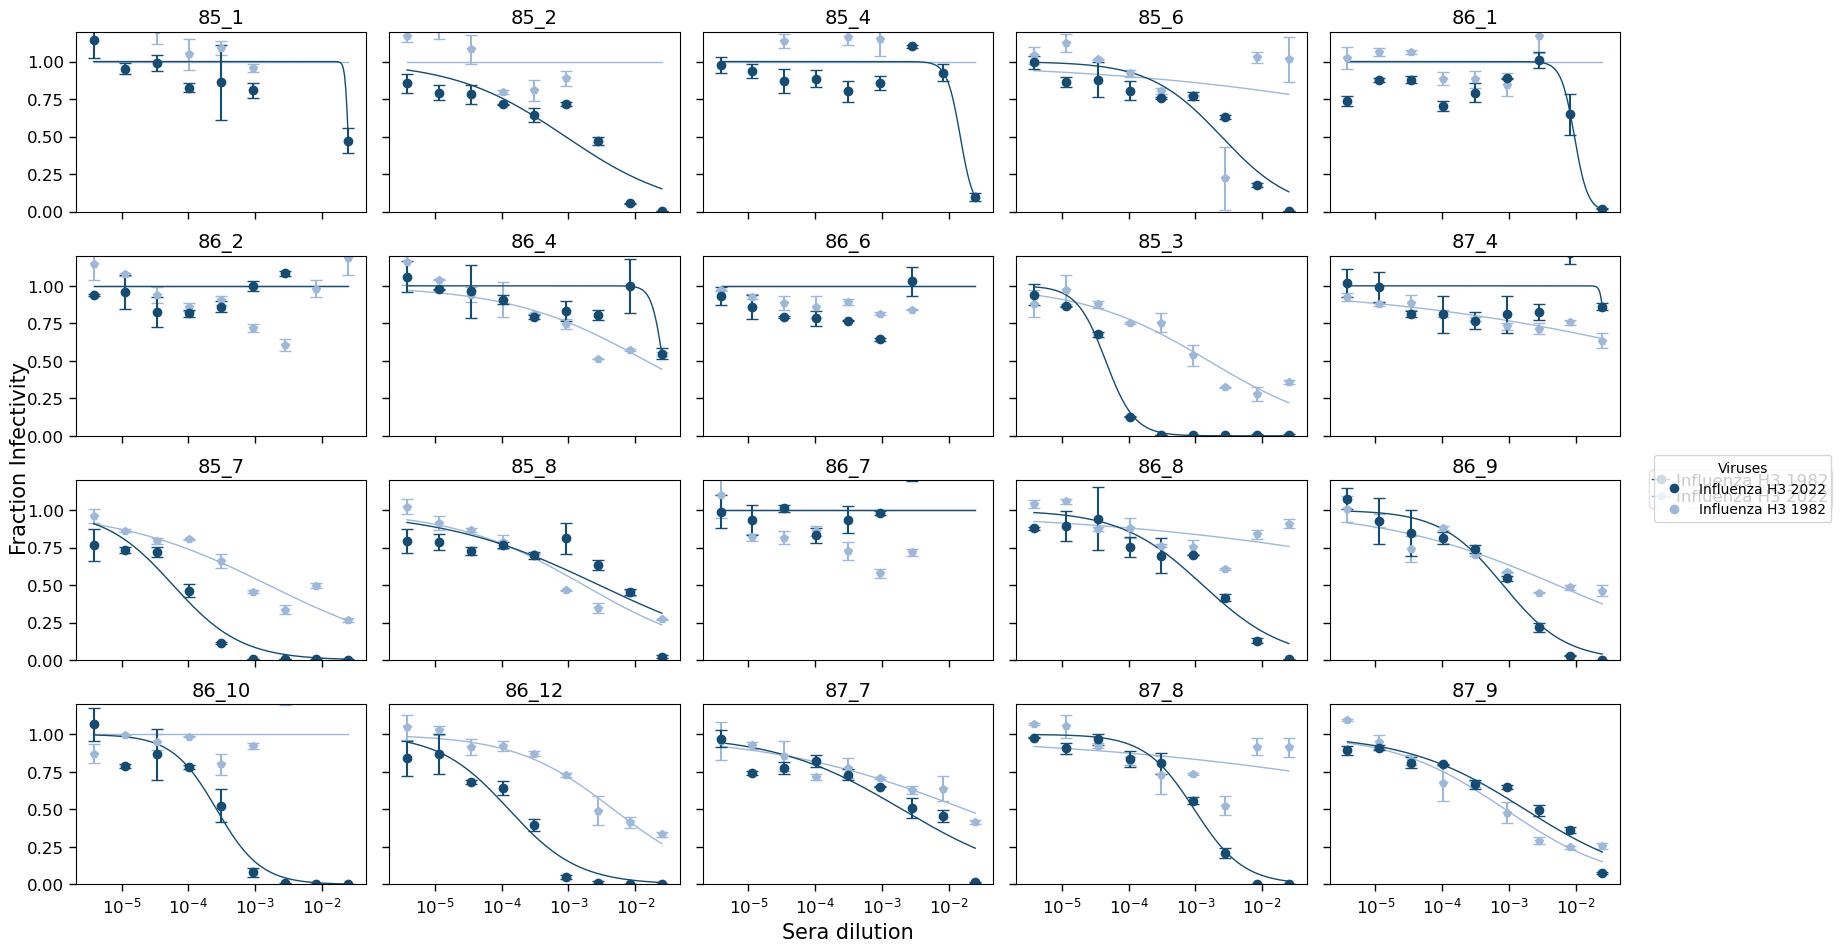

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Plot using neutcurve's plotSera method
fig, axes = H3_historic_fits_1.plotSera(
    viruses=[
        'Influenza H3 1982', 
        'Influenza H3 2022', 
    ],
    xlabel='Sera dilution',
    ylabel="Fraction Infectivity",
    max_viruses_per_subplot=12,
    colors=['#144c73', '#9eb8da'],
    markers=['o', 'p', 'v', 's', 'o', '^', 'D', 's', 'v', '8', 's', 'o'],
    draw_in_bounds=True,
    ncol=5
)

# Simply increase figure width
fig.set_size_inches(fig.get_size_inches()[0] * 1.05, fig.get_size_inches()[1])  

# Remove legends from individual subplots
if isinstance(axes, np.ndarray):
    for ax in axes.flatten():
        ax.set_ylim(0, 1.2)
        ax.legend().set_visible(False)  
else:
    axes.set_ylim(0, 1.2)
    axes.legend().set_visible(False)

# Manually create a shared legend
legend_labels = ['Influenza H3 2022', 'Influenza H3 1982']
legend_colors = ['#144c73', '#9eb8da']

legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=label)
                  for color, label in zip(legend_colors, legend_labels)]

# Add shared legend
fig.legend(handles=legend_handles, loc="center left", bbox_to_anchor=(1, 0.5), title="Viruses")

# Save and show the figure
fig.savefig('03_output/plots/Supplemental_Curves_Historic_Sera_H3_rep1.svg', bbox_inches='tight')
plt.show()


In [27]:
H3_historic_fits_2 = neutcurve.curvefits.CurveFits(
            data=H3_2,
            fixbottom=0,
            #max_viruses_per_subplot=11
            )
#RSV_1_fits.fitParams().to_csv("03_output/processed_data/RSV_Historical_Sera_1_fits.csv")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Plot using neutcurve's plotSera method
fig, axes = H3_historic_fits_2.plotSera(
    viruses=[
        'Influenza H3 1982', 
        'Influenza H3 2022', 
    ],
    xlabel='Sera dilution',
    ylabel="Fraction Infectivity",
    max_viruses_per_subplot=12,
    colors=['#144c73', '#9eb8da'],
    markers=['o', 'p', 'v', 's', 'o', '^', 'D', 's', 'v', '8', 's', 'o'],
    draw_in_bounds=True,
    ncol=5
)

# Simply increase figure width
fig.set_size_inches(fig.get_size_inches()[0] * 1.05, fig.get_size_inches()[1])  

# Remove legends from individual subplots
if isinstance(axes, np.ndarray):
    for ax in axes.flatten():
        ax.set_ylim(0, 1.2)
        ax.legend().set_visible(False)  
else:
    axes.set_ylim(0, 1.2)
    axes.legend().set_visible(False)

# Manually create a shared legend
legend_labels = ['Influenza H3 2022', 'Influenza H3 1982']
legend_colors = ['#144c73', '#9eb8da']

legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=label)
                  for color, label in zip(legend_colors, legend_labels)]

# Add shared legend
fig.legend(handles=legend_handles, loc="center left", bbox_to_anchor=(1, 0.5), title="Viruses")

# Save and show the figure
fig.savefig('03_output/plots/Supplemental_Curves_Historic_Sera_H3_rep2.svg', bbox_inches='tight')
plt.show()


/fh/fast/bloom_j/software/miniforge3/envs/BloomLab/lib/python3.12/site-packages/neutcurve/hillcurve.py:803: OptimizeWarning: Covariance of the parameters could not be estimated
  (popt, pcov) = scipy.optimize.curve_fit(
/fh/fast/bloom_j/software/miniforge3/envs/BloomLab/lib/python3.12/site-packages/neutcurve/hillcurve.py:1177: RuntimeWarning: invalid value encountered in power
  return b + (t - b) / (1 + (c / m) ** s)
/fh/fast/bloom_j/software/miniforge3/envs/BloomLab/lib/python3.12/site-packages/neutcurve/hillcurve.py:803: OptimizeWarning: Covariance of the parameters could not be estimated
  (popt, pcov) = scipy.optimize.curve_fit(
/fh/fast/bloom_j/software/miniforge3/envs/BloomLab/lib/python3.12/site-packages/neutcurve/hillcurve.py:803: OptimizeWarning: Covariance of the parameters could not be estimated
  (popt, pcov) = scipy.optimize.curve_fit(
/fh/fast/bloom_j/software/miniforge3/envs/BloomLab/lib/python3.12/site-packages/neutcurve/hillcurve.py:803: OptimizeWarning: Covariance of